# Assignment 2 - Plotting Weather 2005-2015
### The Requirements

This notebook is my submission to Assignment Two of the *Applied Plotting, Charting & Data Representation in Python* by the University of Michigan, offered on Coursera. 

The requirements posted are:
1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

### The Data
High and low temperatures from various weather stations in the Ann Arbor, MI area, collected by NOAA.  
Our data is formatted as follows:
- **ID** - The unique identifier of the station
- **Date** - The date of the record in YYYY-MM-DD format. I remove leap day (2/29) readings, because they are fewer and therefore I am less confident in them.
- **Element** - The type of entry. TMAX corresponds to the daily high, and TMIN corresponds to the daily low
- **Data_Value** - The temperature measured in tenths of a degree Celcius. However, upon reading the data, I convert the value to whole degrees Celcius

The following is a visualization of the weather stations from which the data was collected, provided by the authors of the course:

In [348]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [542]:
def read_and_clean_data():
    # Read dataframe, remove unwanted values
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv', parse_dates=['Date'])
    df = df.drop(df[(df['Date'].dt.month == 2) & (df['Date'].dt.day == 29)].index)
    df['Data_Value'] = df['Data_Value'] / 10
    return df
        
df = read_and_clean_data()
df.head(3)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8


Create a new dataframe containing the record highs and lows for both 2005-2014 and the year 2015.

In [473]:
df_base_period = df[(df['Date'] >= '2005-01-01') & (df['Date'] <= '2014-12-31')]

# groupby day of year with minimum and maximum temps for base period (2005-2015)
df_records = pd.DataFrame((df_base_period[df_base_period['Element'] == 'TMIN']
                .groupby(df_base_period['Date'].dt.strftime("%m/%d"))['Data_Value']
                .min()))
df_records.rename({'Data_Value': 'Base Low'}, axis=1, inplace=True)
df_records['Base High'] = (df_base_period[df_base_period['Element'] == 'TMAX']
            .groupby(df_base_period['Date'].dt.strftime("%m/%d"))['Data_Value']
            .max())

# groupby day of year with minimum and maximum temps for year 2015
df_2015 = df[df['Date'] >= '2015-01-01']
df_records['2015 Low'] = (df_2015[df_2015['Element'] == 'TMIN']
            .groupby(df_2015['Date'].dt.strftime("%m/%d"))['Data_Value']
            .min())
df_records['2015 High'] = (df_2015[df_2015['Element'] == 'TMAX']
            .groupby(df_2015['Date'].dt.strftime("%m/%d"))['Data_Value']
            .max())

Text(0.5, 1.0, '2005-2015 Ann Arbor Record Daily Temperatures')

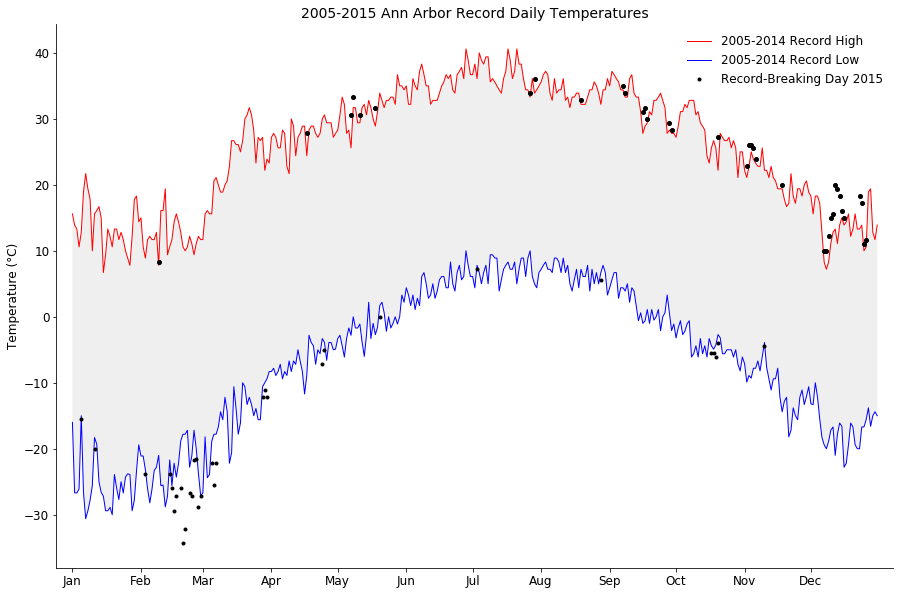

In [548]:
# Plot 2005-2014 records
plt.figure(figsize=(15,10))
plt.margins(x=.02)
plt.plot(df_records['Base High'], '-r', linewidth=1, label='2005-2014 Record High')
plt.plot(df_records['Base Low'], '-b', linewidth=1, label='2005-2014 Record Low')

# Plot days that 2015 broke record
record_high_2015 = df_records[df_records['2015 High'] > df_records['Base High']]['2015 High']
record_low_2015 = df_records[df_records['2015 Low'] < df_records['Base Low']]['2015 Low']
plt.plot(record_low_2015, 'ok', label='Record-Breaking Day 2015', markersize=3)
plt.plot(record_high_2015, 'ok', markersize=4)

# Shade between max and min
ax = plt.gca()
ax.fill_between(range(len(s_min)), 
                   s_min, s_max, 
                   facecolor='grey', 
                   alpha=0.12)

# Replace labels with first day of each month, mapped to a dictionary with abbreviations
locs, labels = plt.xticks()
labels = list(s_min.index)
month_dict = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May', '06': 'Jun',
              '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
labels = [month_dict[date[:2]] if date[-2:] == '01' else None for date in labels]

# Determine which labels are unneeded, then remove them
xticks = zip(locs, labels)
xticks = [(loc, label) for (loc, label) in xticks if label]
locs, labels = zip(*xticks)
plt.xticks(locs, labels)

# Label graph and y-axis
plt.ylabel('Temperature (°C)', size=12)

# Remove upper and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add legend, title, and remove margins
plt.legend(frameon=False, prop={'size': 12}, loc='upper right')
plt.title("2005-2015 Ann Arbor Record Daily Temperatures", size=14)

**In summary**

Record high temperatures from 2005-2014 were exceeded **37** times in 2015, while record lows were exceeded **32** times. If there were no difference between 2015 and the other years, approximately **33** record-breaking highs and lows would occur annually.